#**Assignment 1: SARA comment classification**
###Problem
Babe app is the most popular news and video aggregated application in Indonesia. There are thousands of new comments on Babe application everyday. But many comments are SARA comments which have religious discrimination and blasphemy content.
###Your task
Your task is developing a Logistic Regression model which can detect SARA comments automatically.
###Provided data/script
* Indonesian Dictionary:  The list of the most frequent words in Indonesia (202115 words).
* Indonesian stop words: List of stop words in Indonesia (7224 words).
* Training set: there are 60392 normal comments and 14908 Sara comments.
* Test set:  there are 6830 normal comments and 2816 Sara comments.

###Notes
* You should write a code to compute some evaluation metrics: Accuracy, Precision, Recall, and F1-score.
* You have to write a document to explain your solution and how to run model training and testing.


In [2]:
#%%sh
#!pip install pandas
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import os
os.listdir(os.path.join('gdrive', 'My Drive', 'ML lectures', 'Logistic Regression', 'data', 'dicts'))

['stop_words.txt', 'id_full.txt']

In [0]:
data_dir = os.path.join('gdrive', 'My Drive', 'ML lectures', 'Logistic Regression', 'data')
# Reading training texts
cmt_norm_file = os.path.join(data_dir, 'sara', 'normal_comments.txt')
cmt_sara_file = os.path.join(data_dir, 'sara', 'sara_comments.txt')
#cmt_norm_test_file = os.path.join(data_dir, 'sara', 'test_data', 'normal_comments.txt')
#cmt_sara_test_file = os.path.join(data_dir, 'sara', 'test_data', 'sara_comments.txt')

In [0]:
# Read texts into list
def read_lines(filepath):
    with open(filepath) as fp:
        content = fp.readlines()
        content = [x.strip() for x in content]
    return content
  
 

In [59]:
cmt_norm = read_lines(cmt_norm_file)
cmt_sara = read_lines(cmt_sara_file)
#cmt_norm_test = read_lines(cmt_norm_test_file)
#cmt_sara_test = read_lines(cmt_sara_test_file)
print('data set size: ',len(cmt_norm), len(cmt_sara))


data set size:  67222 17724


In [0]:
#cmt_norm_all = cmt_norm_train + cmt_norm_test
#cmt_sara_all = cmt_sara_train + cmt_sara_test

#print(len(cmt_norm_all), len(cmt_sara_all))

In [0]:
import pandas as pd
# create a dataframe for all training texts, with their labels
def create_dataframe_with_label(cmt_norm, cmt_sara):
  cmt_all = cmt_norm + cmt_sara
  # make label
  label = []
  for _ in cmt_norm:
    label.append(0)
  for _ in cmt_sara:
    label.append(1)
  # create a pandas dataframe using texts and labels
  trainDF = pd.DataFrame()
  trainDF['text'] = cmt_all
  trainDF['label'] = label
  return trainDF

In [62]:
data = create_dataframe_with_label(cmt_norm, cmt_sara)
print(data.head(20))

                                                 text  label
0                                                          0
1   In sya Allah.....mereka berhasil ubtuk menguba...      0
2   Kasian,akibat terpojok,fitnah sana sini,salut ...      0
3                          Allahu Akbar.....hidup FPI      0
4                                               pamer      0
5   Mantap Tegakkan Hukum dgn seadil~adilnya Benar...      0
6                            AMIEN RAIS DALANGNYA...!      0
7   Silakan usut pak asal yg bener ngusutnya... Jg...      0
8   Heheehhee, rizieq pintar kali berkelit yaa..!!...      0
9   AHOK BATAL CAGUB???? DR SKG AJ DBUAT ATURAN SP...      0
10  Bapak  10  thn  nga  afa  yg  bapak  buat  din...      0
11  Wkwkwkwk nasier makin ngawur ya ... Percaya nu...      0
12  Baru terjadi di dunia penjahat jadi penjabat, ...      0
13                                                  0      0
14  Ini negara hukum, tangkap dan selesaikan sesua...      0
15  Prass @   Gua udah 2

In [63]:
print(data.sample(30))

                                                    text  label
60433  Ya dulu pass saya tinggal di Kutai kartanegara...      0
51223  Lihat foto pejabat kabinet ga\tSemua islam mau...      0
13557     Lah...  Muka aja muka korup jauh sama tetangga      0
79335  Bangsaat... Buat sesat ajah ni berita?? Peneli...      1
64158  Sudah jelas menistakan islam masih putar puter...      0
32921         Q salut trhdp Ahok kjjuranya trll full gar      0
23802  SBY senangnya Intervensi, Intervensi MUI, Inte...      0
12461  Tidak ada yg abadi di dunia ini...  Tak ada ga...      0
28745                 yang kurang ajar koq dipelihara???      0
4587   masalah yg mana ya pak dungu..??? masalah di d...      0
76588                                            Koplak.      1
16329  Hahaa emg negara ini sudi milih bapak? Maaf pa...      0
17428  Lagu lama bos,, paling ujung2 nya bebas. "NUNG...      0
757                                GUE DUAâœŒâœŒðŸ‘ðŸ‘      0
68482  Hura2 cuma sesaat, yg bagus hura2

In [0]:
def load_stop_words():
  # Get the set of stopwords
  stop_words_f = os.path.join(data_dir, 'dicts', 'stop_words.txt')

  flines = read_lines(stop_words_f)
  return set([x.strip() for x in flines])

In [65]:
stop_words = load_stop_words()
print(len(stop_words))

7193


In [0]:
#install beautifulSoup
#!pip install bs4
# For cleansing
from bs4 import BeautifulSoup
import re
# text cleansing function
def raw_to_words(raw_text, stop_words=None):
    # 1. Remove HTML
    text_1 = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", text_1)
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 4. Remove stop words
    if stop_words:
        meaningful_words = [w for w in words if not w in stop_words]   
    else:
        meaningful_words = words
    
    # 5. Join the words back into one string separated by space & return
    return(" ".join(meaningful_words))

In [67]:
# check to see how the cleansing function works
print(cmt_norm[1])
print(raw_to_words(cmt_norm[1], stop_words=stop_words))
print(raw_to_words(cmt_norm[1], stop_words=stop_words))

In sya Allah.....mereka berhasil ubtuk mengubah kehidupan keluarganya. Aamiin yaa rabbal'aalamiin.
allah berhasil ubtuk mengubah kehidupan keluarganya aamiin
allah berhasil ubtuk mengubah kehidupan keluarganya aamiin


In [69]:
clean_data = data
clean_data['text'] = clean_data['text'].apply(raw_to_words, stop_words=stop_words)
clean_data = clean_data.loc[clean_data['text']!='']
print(clean_data.head())

                                                text  label
1  allah berhasil ubtuk mengubah kehidupan keluar...      0
2  kasian akibat terpojok fitnah salut tau dri ah...      0
3                             allahu akbar hidup fpi      0
4                                              pamer      0
5  mantap tegakkan hukum dgn seadil adilnya benar...      0


In [0]:
# Plot
#import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, stop_words, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        #max_words=200,
        max_font_size=80,
        width=800,
        height=600,
        ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 6))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [72]:
#get negative samples
neg_samples = clean_data.loc[clean_data['label'] == 0]

# get positive sampels
pos_samples = clean_data.loc[clean_data['label'] == 1]

bigtext_sara = " ".join(list(pos_samples['text']))
print(len(bigtext_sara))
bigtext_norm = " ".join(list(neg_samples['text']))
print(len(bigtext_norm))

1303515
3586911


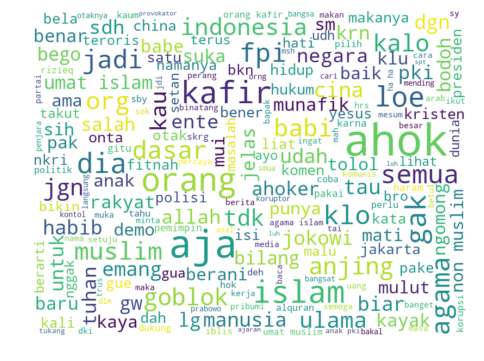

In [74]:
show_wordcloud(bigtext_sara, stop_words)

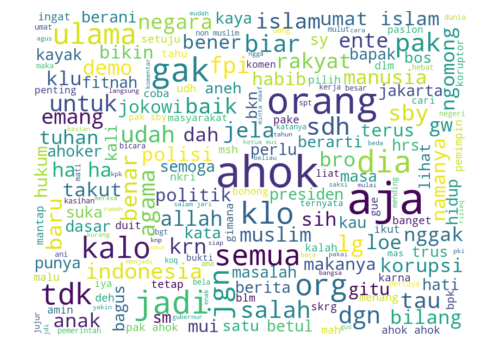

In [75]:
show_wordcloud(bigtext_norm, stop_words)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score

In [78]:
# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(clean_data['text'], clean_data['label'])
print(len(train_x), len(valid_x))

62821 20941


In [79]:
# create a count vectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(clean_data['text'])
# transform the training and validation data using count vectorizer
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)
print(xtrain_count.shape, xvalid_count.shape)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(clean_data['text'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.shape, xvalid_tfidf.shape)

(62821, 53647) (20941, 53647)
(62821, 53647) (20941, 53647)


In [80]:
#train model
logistic_r = linear_model.LogisticRegression()
logistic_r.fit(xtrain_tfidf, train_y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
# get the predictions
pred_valid = logistic_r.predict(xvalid_tfidf)
print("Validation set")
print("Accuracy:", metrics.accuracy_score(pred_valid, valid_y))
print("Report:\n", metrics.classification_report(valid_y, pred_valid))

Validation set
Accuracy: 0.8685831622176592
Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     16536
           1       0.87      0.44      0.59      4405

   micro avg       0.87      0.87      0.87     20941
   macro avg       0.87      0.71      0.75     20941
weighted avg       0.87      0.87      0.85     20941

